# **Week 8 :**
### **Loan Approval Prediction** 
#### Que : **Data Preprocessing and feature engineering**
---

### *Importing Libraries and Dataset*

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('dataset/Training Dataset.csv')
test_df = pd.read_csv('dataset/Test Dataset.csv')

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
print('Train Info : ')
print(train_df.info())

Train Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [9]:
print('Test Info : ')
print(test_df.info())

Test Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
None


In [11]:
train_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
test_df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### *Data Cleaning and Handling Missing Values*

In [14]:
print('Filling Missing Values of Train Dataset')

Filling Missing Values of Train Dataset


In [ ]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna('No', inplace=True)
train_df['Dependents'].replace('3+', 3, inplace=True)
train_df['Dependents'].fillna(0, inplace=True)

In [15]:
print('Filling Missing Values of Test Dataset')

Filling Missing Values of Test Dataset


In [ ]:
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna('No', inplace=True)
test_df['Dependents'].replace('3+', 3, inplace=True)
test_df['Dependents'].fillna(0, inplace=True)

### *Categorical to Numerical by Label Encoding*

In [17]:
le = LabelEncoder()

In [18]:
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])

In [19]:
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(5), int64(2), object(2)
memory usage: 50.5+ KB


In [24]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int32  
 2   Married            367 non-null    int32  
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    int32  
 5   Self_Employed      367 non-null    int32  
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    int32  
dtypes: float64(3), int32(5), int64(2), object(2)
memory usage: 27.4+ KB


### *Visualizing Data*

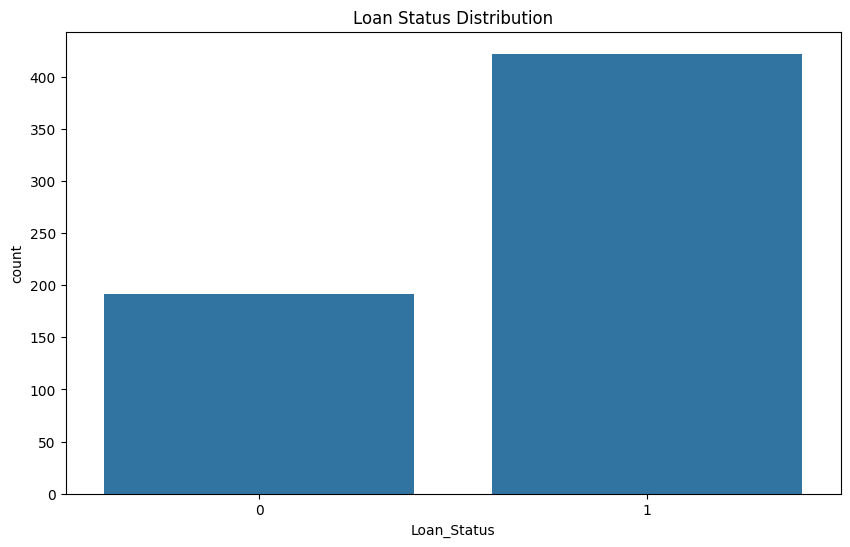

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Loan Status Distribution')
plt.show()

### *Feature Engineering* for *Predictive Modeling*

#### *Train-Test Split*

In [25]:
X = train_df.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_df['Loan_Status']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
X_test = test_df.drop(columns=['Loan_ID'])

### *Modelling*

In [33]:
random_forest = RandomForestClassifier(random_state=42)
gradient_boost = GradientBoostingClassifier(random_state=42)

In [34]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [36]:
y_pred_random_forest = random_forest.predict(X_val)
y_pred_gradient_boost = gradient_boost.predict(X_val)

In [37]:
acc_random_forest = accuracy_score(y_val, y_pred_random_forest)
acc_gradient_boost = accuracy_score(y_val, y_pred_gradient_boost)

In [38]:
print(f'Random Forest Accuracy: {acc_random_forest}')
print(f'Gradient Boosting Accuracy: {acc_gradient_boost}')

Random Forest Accuracy: 0.7792207792207793
Gradient Boosting Accuracy: 0.7532467532467533


In [39]:
model_accuracies = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting'],
    'Accuracy': [ acc_random_forest, acc_gradient_boost]
})

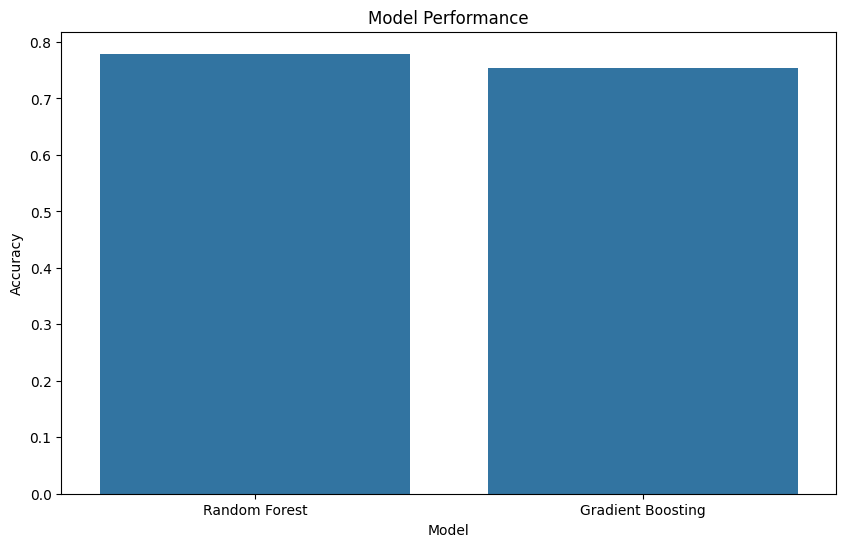

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_accuracies)
plt.title('Model Performance')
plt.show()

> Using Random Forest for further process as it have higher accuracy

In [41]:
test_predictions = random_forest.predict(X_test)

### **Loan Approval Predictions**

In [42]:
submission_df = pd.DataFrame({
    'Loan_ID': test_df['Loan_ID'],
    'Loan_Status': test_predictions
})

In [43]:
submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1: 'Y', 0: 'N'})

In [44]:
submission_df.to_csv('Loan_Approval_Predictions.csv', index=False)

---
---